In [29]:
# Import Statement

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn import svm
from matplotlib import pyplot as plt
from PIL import Image
from scipy import misc
from scipy import ndimage

import cv2
np.set_printoptions(threshold=np.nan)

In [3]:
# Data Loading

train_x = np.load('./data/train_images.npy', encoding='latin1')
train_x = train_x[:,1]
train_y = pd.read_csv('./data/train_labels.csv', encoding='latin-1')
train_y = np.asarray(train_y['Category']) # To access labels: train_y[index]

test_x = np.load('./data/test_images.npy', encoding='latin1')
test_x = test_x[:,1]

print("Data loaded.")

Data loaded.


# Playing with different image processing methods

In [5]:
# one test image
t = (train_x[0].reshape(100,100))

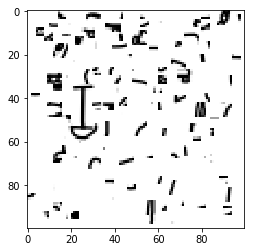

In [6]:
# original image
plt.imshow(t, cmap='Greys')
plt.show()

## a. Denoising (Median Blur, Gaussian Blur)

In [39]:
med_denoised = ndimage.median_filter(t, 3)
gauss_denoised = ndimage.gaussian_filter(t, 2)

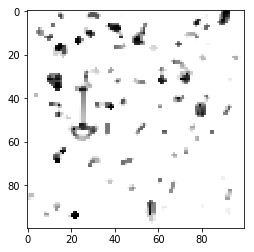

In [77]:
# Median Blur Denoising
plt.imshow(med_denoised, cmap='Greys')
plt.show()

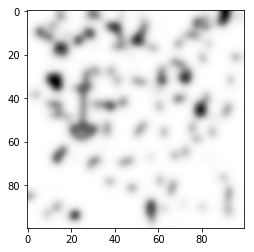

In [40]:
# Gaussian Blur Denoising
plt.imshow(gauss_denoised, cmap='Greys', interpolation='gaussian')
plt.show()

## b. Edge Detection

In [64]:
sx = ndimage.sobel(t, axis=0, mode='constant')
sy = ndimage.sobel(t, axis=1, mode='constant')
sob = np.hypot(sx, sy)

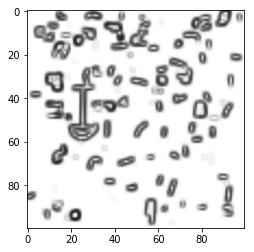

In [65]:
plt.imshow(sob, cmap='Greys', interpolation='gaussian')
plt.show()

## c. Binary Erosion

In [59]:
open_square = ndimage.binary_opening(t)
eroded_square = ndimage.binary_erosion(t)
reconstruction = ndimage.binary_propagation(eroded_square, mask=t)

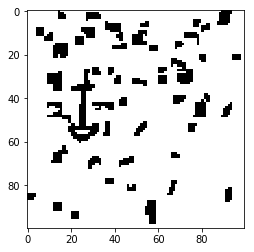

In [62]:
plt.imshow(reconstruction, cmap='Greys')
plt.show()

# Process Train Data 

## a. Image processing with the edge detection approach

In [68]:
def edge(data_x):
    new_data = []
    counter = 0
    for i in data_x:
        t = i.reshape(100,100)
        sx = ndimage.sobel(t, axis=0, mode='constant')
        sy = ndimage.sobel(t, axis=1, mode='constant')
        new_data.append(np.hypot(sx, sy))
    return new_data
        

In [78]:
train_edge_x = edge(train_x)

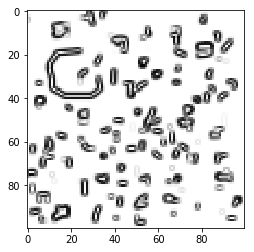

In [74]:
plt.imshow(train_x_edge[100], cmap='Greys')
plt.show()

## b. Binary Erosion

In [71]:
def binary(data_x):
    new_data = []
    for i in data_x:
        t = i.reshape(100,100)
        open_square = ndimage.binary_opening(t)
        eroded_square = ndimage.binary_erosion(t)
        new_data.append(ndimage.binary_propagation(eroded_square, mask=t))
    return new_data

In [75]:
train_x_binary = binary(train_x)

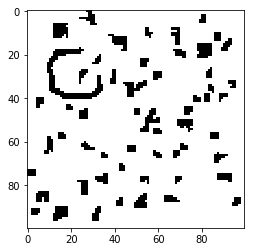

In [76]:
plt.imshow(train_x_binary[100], cmap='Greys')
plt.show()